<a href="https://colab.research.google.com/github/John260260/Classification_problms_ML/blob/main/brst_cancer_log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import metrics
%matplotlib inline

In [ ]:
x,y = datasets.load_breast_cancer(return_X_y= True)

In [ ]:
feature_name = datasets.load_breast_cancer().feature_names
target_name = datasets.load_breast_cancer().target_names

In [ ]:
df = pd.DataFrame(x,columns = feature_name)
df['target']=y

In [ ]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
Counter (df['target'])

Counter({0: 212, 1: 357})

In [ ]:
357/(212+357)

0.6274165202108963

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train,test = train_test_split(df,test_size =0.2,random_state =1 )

In [ ]:
x_train=train.drop('target',axis=1)
y_train=train['target']
x_test=test.drop('target',axis=1)
y_test=test['target']

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
y_train_proba=model.predict_proba(x_train)
y_test_proba=model.predict_proba(x_test)

In [ ]:
model=LogisticRegression(penalty='l2', C=10, class_weight='balanced')
model.fit(x_train,y_train)
y_train_predict= model.predict(x_train)
y_test_predict=model.predict(x_test)
print('Train Data')
print(metrics.classification_report(y_train,y_train_predict))
print('Test Data')
print(metrics.classification_report(y_test,y_test_predict))

Train Data
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       170
           1       0.96      0.95      0.95       285

    accuracy                           0.94       455
   macro avg       0.94      0.94      0.94       455
weighted avg       0.94      0.94      0.94       455

Test Data
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
confusion_matrix(y_train,y_train_predict) #here the threshold is .5 by default now if i have to define the threshold on my terms i have to create a function

array([[158,  12],
       [ 14, 271]])

In [ ]:
def proba_class(y_proba,threshold):
  predicted_class=[1 if a[1]>threshold else 0 for a in y_proba]
  return np.array(predicted_class)


In [ ]:
 proba_class(y_train_proba,0.50)==y_train_predict ##true should only come if false is coming smver it has been different

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

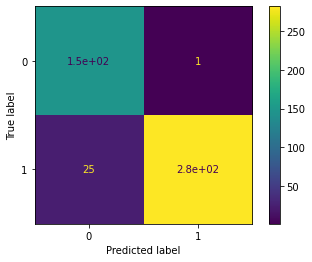

In [ ]:
plot_confusion_matrix(model, x_train,y_train_pred)
plt.show()

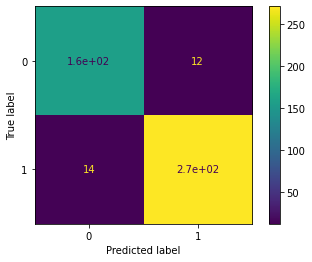

In [ ]:
plot_confusion_matrix(model, x_train,y_train)
plt.show()

In [ ]:
from sklearn.metrics import precision_score,recall_score,fbeta_score
from sklearn.metrics import precision_recall_curve

In [ ]:
def classification_metrics(y_actual,y_pred):
  precision= precision_score(y_actual,y_pred)
  recall=recall_score(y_actual,y_pred)
  fb=fbeta_score(y_actual,y_pred, beta=1)
  print("precision:{}, recall:{}, f1_score:{}".format(round(precision,2),round(recall,2),round(fb,2)))

In [ ]:
classification_metrics(y_train,y_train_predict)
classification_metrics(y_test,y_test_predict)

precision:0.96, recall:0.95, f1_score:0.95
precision:0.94, recall:0.94, f1_score:0.94


In [ ]:
for threshold in range (10,100,10):
  trsh=threshold/100
  y_pred_train=proba_class(y_train_proba,trsh)
  print('Threshold:{}'.format(trsh))
  classification_metrics(y_train, y_pred_train) 


Threshold:0.1
precision:0.91, recall:0.99, f1_score:0.95
Threshold:0.2
precision:0.92, recall:0.98, f1_score:0.95
Threshold:0.3
precision:0.93, recall:0.97, f1_score:0.95
Threshold:0.4
precision:0.94, recall:0.96, f1_score:0.95
Threshold:0.5
precision:0.96, recall:0.95, f1_score:0.95
Threshold:0.6
precision:0.97, recall:0.94, f1_score:0.95
Threshold:0.7
precision:0.98, recall:0.92, f1_score:0.95
Threshold:0.8
precision:0.99, recall:0.86, f1_score:0.92
Threshold:0.9
precision:1.0, recall:0.78, f1_score:0.87


In [ ]:
def classification_metrics(y_actual,y_pred):
  precision= precision_score(y_actual,y_pred)
  recall=recall_score(y_actual,y_pred)
  fb=fbeta_score(y_actual,y_pred, beta=1)
  print("precision:{}, recall:{}, f1_score:{}".format(round(precision,2),round(recall,2),round(fb,2)))
  return(precision,recall,fb)

In [ ]:
thresholds_curve=[]
prec=[]
recall=[]
fb=[]
for threshold in range (10,100,10):
  trsh=threshold/100
  y_pred_train=proba_class(y_train_proba,trsh)
  print('Threshold:{}'.format(trsh))
  p,r,f=classification_metrics(y_train, y_pred_train)
  thresholds_curve.append(trsh)
  prec.append(p)
  recall.append(r)
  fb.append(f)


Threshold:0.1
precision:0.91, recall:0.99, f1_score:0.95
Threshold:0.2
precision:0.92, recall:0.98, f1_score:0.95
Threshold:0.3
precision:0.93, recall:0.97, f1_score:0.95
Threshold:0.4
precision:0.94, recall:0.96, f1_score:0.95
Threshold:0.5
precision:0.96, recall:0.95, f1_score:0.95
Threshold:0.6
precision:0.97, recall:0.94, f1_score:0.95
Threshold:0.7
precision:0.98, recall:0.92, f1_score:0.95
Threshold:0.8
precision:0.99, recall:0.86, f1_score:0.92
Threshold:0.9
precision:1.0, recall:0.78, f1_score:0.87


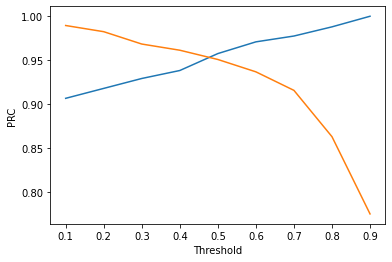

In [ ]:
sns.lineplot(x= thresholds_curve, y= prec)
sns.lineplot(x= thresholds_curve, y= recall)
plt.xlabel('Threshold')
plt.ylabel('PRC')
plt.show()

In [ ]:
for threshold in range (10,100,10):
  trsh=threshold/100
  y_pred_test=proba_class(y_test_proba,trsh)
  print('Threshold:{}'.format(trsh))
  classification_metrics(y_test, y_pred_test) 


Threshold:0.1
precision:0.87, recall:1.0, f1_score:0.93
Threshold:0.2
precision:0.89, recall:0.99, f1_score:0.93
Threshold:0.3
precision:0.9, recall:0.99, f1_score:0.94
Threshold:0.4
precision:0.93, recall:0.96, f1_score:0.95
Threshold:0.5
precision:0.94, recall:0.94, f1_score:0.94
Threshold:0.6
precision:0.94, recall:0.93, f1_score:0.94
Threshold:0.7
precision:0.96, recall:0.92, f1_score:0.94
Threshold:0.8
precision:0.98, recall:0.86, f1_score:0.92
Threshold:0.9
precision:1.0, recall:0.81, f1_score:0.89


in .60 threshold my precision recall and f1 score is bettr than .50 since its false neg is less thus giving me grtr true positive in total positive cases and its imp for me to identify the true pos cases 

In [ ]:
thresholds_curve_test=[]
prec_test=[]
recall_test=[]
fb_test=[]
for threshold in range (10,100,10):
  trsh=threshold/100
  y_pred_test=proba_class(y_test_proba,trsh)
  print('Threshold:{}'.format(trsh))
  p,r,f=classification_metrics(y_test, y_pred_test)
  thresholds_curve_test.append(trsh)
  prec_test.append(p)
  recall_test.append(r)
  fb_test.append(f)

Threshold:0.1
precision:0.87, recall:1.0, f1_score:0.93
Threshold:0.2
precision:0.89, recall:0.99, f1_score:0.93
Threshold:0.3
precision:0.9, recall:0.99, f1_score:0.94
Threshold:0.4
precision:0.93, recall:0.96, f1_score:0.95
Threshold:0.5
precision:0.94, recall:0.94, f1_score:0.94
Threshold:0.6
precision:0.94, recall:0.93, f1_score:0.94
Threshold:0.7
precision:0.96, recall:0.92, f1_score:0.94
Threshold:0.8
precision:0.98, recall:0.86, f1_score:0.92
Threshold:0.9
precision:1.0, recall:0.81, f1_score:0.89


In [ ]:
y_pred_train= proba_class(y_train_proba,0.60)
confusion_matrix(y_train,y_pred_train)

array([[162,   8],
       [ 18, 267]])

In [ ]:
y_pred_test=proba_class(y_test_proba,0.60)
confusion_matrix(y_test,y_pred_test)

array([[38,  4],
       [ 5, 67]])

In [ ]:
classification_metrics(y_train,y_pred_train)
classification_metrics(y_test,y_pred_test)

precision:0.94, recall:0.96, f1_score:0.95
precision:0.93, recall:0.96, f1_score:0.95


In [ ]:
model2=LogisticRegression(penalty='l2', C=10, class_weight=None)
model2.fit(x_train,y_train)
y_train_predict2= model2.predict(x_train)
y_test_predict2=model2.predict(x_test)
print('Train Data')
print(metrics.classification_report(y_train,y_train_predict))
print('Test Data')
print(metrics.classification_report(y_test,y_test_predict))

Train Data
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       170
           1       0.96      0.95      0.95       285

    accuracy                           0.94       455
   macro avg       0.94      0.94      0.94       455
weighted avg       0.94      0.94      0.94       455

Test Data
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
y_train_proba2=model2.predict_proba(x_train)
y_test_proba2=model2.predict_proba(x_test)

In [ ]:
Counter (y_test_predict)

Counter({0: 42, 1: 72})

In [ ]:
#for a in y_train_proba2:
  #print (a[1])

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train,[a[1] for a in y_train_proba2])

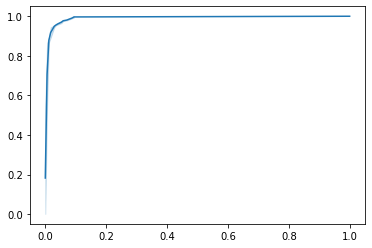

In [ ]:
sns.lineplot(x=fpr,y=tpr)

In [ ]:
roc_auc_train= pd.DataFrame(fpr,columns=['FPR'])
roc_auc_train['TPR']=tpr
roc_auc_train['Threshold']=thresholds

In [ ]:
roc_auc_train

,FPR,TPR,Threshold
0,0.000000,0.000000,1.999975e+00
1,0.000000,0.003509,9.999748e-01
2,0.000000,0.543860,9.917120e-01
3,0.005882,0.543860,9.914208e-01
4,0.005882,0.866667,9.345698e-01
5,0.011765,0.866667,9.344372e-01
6,0.011765,0.891228,9.008992e-01
7,0.017647,0.891228,8.921931e-01
8,0.017647,0.943860,8.185824e-01
9,0.029412,0.943860,7.944749e-01


In [ ]:
from sklearn.metrics import roc_curve
fpr2,tpr2,thresholds2=roc_curve(y_test,[a[1] for a in y_test_proba2])

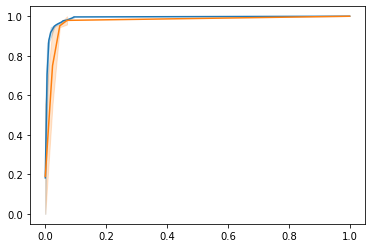

In [ ]:
sns.lineplot(x=fpr,y=tpr)
sns.lineplot(x=fpr2,y=tpr2)

In [ ]:
roc_auc_test= pd.DataFrame(fpr2,columns=['FPR'])
roc_auc_test['TPR']=tpr2
roc_auc_test['Threshold']=thresholds2

In [ ]:
roc_auc_test

,FPR,TPR,Threshold
0,0.000000,0.000000,1.999684e+00
1,0.000000,0.013889,9.996844e-01
2,0.000000,0.555556,9.897223e-01
3,0.023810,0.555556,9.896781e-01
4,0.023810,0.944444,8.559352e-01
5,0.047619,0.944444,8.533662e-01
6,0.047619,0.958333,8.260122e-01
7,0.071429,0.958333,8.123457e-01
8,0.071429,1.000000,5.959817e-01
9,1.000000,1.000000,2.466550e-20
